In [ ]:
#pip install jax jaxlib

### Jax library  for optimization of an objective function


The `minimize` function in JAX, particularly when using optimization methods from the `scipy.optimize` module, typically employs deterministic optimization algorithms rather than stochastic reconstruction methods. These algorithms aim to find the minimum of a given objective function without relying on randomness.


One popular deterministic optimization algorithm available in `scipy.optimize` and often used with JAX is the BFGS (Broyden-Fletcher-Goldfarb-Shanno) algorithm. BFGS is a quasi-Newton method that iteratively refines an approximation of the inverse Hessian matrix to find the minimum of a function.


Here is a high-level overview of the BFGS algorithm and its mathematical formulation:

**Initialization:**
- Choose an initial guess for the parameters: $x_0$

- Initialize the inverse Hessian approximation matrix:  $B_0$(usually set to the identity matrix).

**For each iteration $k$:**
- **Evaluate the Objective Function and Gradient:**
    - Evaluate the objective function $f(x_k)$ and its gradient $\Delta f(x_k)$ at the current parameter vector $x_k$.

- **Update parameters:**
    - Find the search direction $p_k$ by solving the equation $B_k p_k = -\Delta f(x_k)$
    - Update the parameter vector: $x_{k+1}=x_k+\alpha_k p_k$, where $\alpha_k$ is chosen via line search.

- **Update Inverse Hessian Approximation:**
   - Update the inverse Hessian approximation matrix $B_{k+1}$ using the BFGS update formula.

The BFGS update formula for the inverse Hessian approximation is given by:

$B_{k+1} = (I-\rho_k y_k s^T_k)B_k (I-\rho_k s_k y^T_k) +\rho_k s_k s^T_k$

where 
- $s_k = x_{k+1} -x_k$ is the step taken in parameter space.

- $y_k = \nabla f (x_{k+1})-\nabla f (x_k)$ is the difference in gradients.

- $\rho_k = \frac{1}{y^T_k s_k}$ is a scaling factor.

- **Convergence Criteria:**
    - Check for the convergence based on criteria such as the change in the parameter vector or the gradient.   

- **Repeat:**
    - If convergence criteria are not met, go back to step 2.

The BFGS algorithm belongs to the class of quasi-Newton methods, and the update formula for the inverse Hessian is a key characteristic of these methods. The use of the inverse Hessian approximation allows BFGS to incorporate second-order information about the objective function, making it more efficient than first-order methods like gradient descent.   



### Optimization algorithms in JAX

JAX provides a variety of optimization algorithms for minimization through the `jax.scipy.optimize` module, which is a subset of the SciPy optimization module adapted for JAX. Here are some of the available minimization algorithms:

- **BFGS (minimize_bfgs):**
    - Broyden-Fletcher-Goldfarb-Shanno (BFGS) algorithm.

- **L-BFGS-B (minimize_l_bfgs_b):**
    - Limited-memory Broyden-Fletcher-Goldfarb-Shanno (L-BFGS-B) algorithm with box constraints.
    
- **CG (minimize_cg):**
    - Conjugate Gradient algorithm.

- **Newton-CG (minimize_newton_cg):**
    - Newton-Conjugate Gradient algorithm.

- **Trust Region Newton-CG (minimize_trust_ncg):**
    - Trust-Region Newton-CG algorithm.

- **Trust Region Constrained (minimize_trust_constr):**
    - Trust-Region Constrained Optimization by Linear Approximations (trust-constr) algorithm.

- **Nelder-Mead (minimize_neldermead):**
    - Nelder-Mead (or Downhill Simplex) algorithm.

- **Powell (minimize_powell):**
    - Powell's conjugate direction method.

- **COBYLA (minimize_cobyla):**
    - Constrained Optimization BY Linear Approximations (COBYLA) algorithm.

- **SLSQP (minimize_slsqp):**
    - Sequential Least SQuares Programming (SLSQP) algorithm.



### Pros and cons of various algorithms used in JAX library


Here's a brief overview of the characteristics of the algorithms mentioned:

 - **Newton-CG (trust-ncg):**
    - Pros: Suitable for large-scale problems. Converges quickly in many cases.
    - Cons: Requires both gradient and Hessian information. May struggle with non-convex and poorly conditioned problems.

- **Trust Region Newton-CG (trust-ncg):**
    - Pros: Handles large-scale problems with efficient memory usage. Suitable for problems with noisy or inaccurate gradients.
    - Cons: Requires both gradient and Hessian information.

- **Trust Region Constrained (trust-constr):**
    - Pros: Handles general constrained optimization problems. Well-suited for problems with nonlinear constraints.
    - Cons: Requires both gradient and Hessian information. Can be computationally expensive.

- **Nelder-Mead:**
    - Pros: Does not require gradient information. Robust for optimizing non-smooth or noisy functions.
    - Cons: May be slow to converge, especially for high-dimensional problems.

- **Powell:**
    - Pros: Does not require gradient information. Effective for optimizing functions with many parameters.
    - Cons: May be slower than gradient-based methods for smooth problems.

- **COBYLA:**
    - Pros: Suitable for optimizing functions with noisy or inaccurate gradients. Handles bound constraints.
    - Cons: Does not use gradient information. May be sensitive to the choice of parameters.

- **SLSQP:**
    - Pros: Handles general constrained optimization problems. Efficient for problems with both equality and inequality constraints.
    - Cons: Requires gradient information.


## Difference between JAX and numpy minimization

JAX (Just Another XLA) and NumPy are both libraries used for numerical computing in Python, but they have different strengths and use cases. Here are some advantages of using JAX over NumPy specifically in the context of minimization problems:

**Automatic Differentiation (Autograd):**
JAX provides a powerful automatic differentiation system (autograd), which allows you to compute gradients of functions automatically. This is crucial for optimization algorithms that rely on gradient information, such as gradient descent variants.
While NumPy doesn't have built-in automatic differentiation, JAX's autograd makes it easier to perform gradient-based optimization without manually calculating derivatives.


**Function Transformation and Compilation:**
JAX allows you to transform Python functions into compiled functions that can be efficiently executed on accelerators like GPUs or TPUs. This can lead to significant speed-ups compared to NumPy for certain operations.
NumPy relies on an interpreter, which might not take full advantage of hardware accelerators. JAX's ability to compile functions can lead to faster execution times in certain scenarios.


**Functional Programming and Immutability:**
JAX encourages functional programming and immutability. This can lead to more predictable behavior and better support for parallel and distributed computing.
NumPy, being more mutable, might have challenges when it comes to parallelization and might require extra caution to avoid unintended side effects.


**Parallel and Distributed Computing:**
JAX is designed with parallel and distributed computing in mind. It allows for easy scaling of computations across multiple devices or even distributed systems.
While NumPy has some support for parallelism, JAX provides more explicit and powerful mechanisms for parallel and distributed computing.


**Support for Accelerators:**
JAX is designed to work seamlessly with accelerators like GPUs and TPUs, providing better performance for large-scale numerical computations.
NumPy can be used with these accelerators through libraries like CuPy, but JAX integrates more smoothly and efficiently with modern hardware.


**Flexibility and Extensibility:**
JAX is more modular and extensible than NumPy. It allows you to define custom transformations and optimizations, making it a suitable platform for research and experimentation.
NumPy has a more monolithic design, which can be limiting for users who want to experiment with or extend the library.



In [24]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from jax import grad
from scipy.optimize import minimize


In [25]:
def objective_function(x):
    return (x[0] - 2)**2 + (x[1] + 3)**2

# Jacobian (gradient) and Hessian of the objective function using JAX
def gradient(x):
    return jax.grad(objective_function)(x)

def hessian(x):
    return jax.hessian(objective_function)(x)

# Convert the objective function to a NumPy function for use with scipy.optimize
objective_function_np = lambda x: objective_function(np.array(x))

# Define the initial guess
initial_guess = np.array([1.0, 1.0])

# Newton-CG
result_newton_cg = minimize(objective_function_np, x0=initial_guess, method='Newton-CG', jac=gradient, hess=hessian)
print("Newton-CG - Optimal solution:", result_newton_cg.x)
print("Newton-CG - Optimal value:", result_newton_cg.fun)

# Trust Region Newton-CG
result_trust_ncg = minimize(objective_function_np, x0=initial_guess, method='trust-ncg', jac=gradient, hess=hessian)
print("Trust Region Newton-CG - Optimal solution:", result_trust_ncg.x)
print("Trust Region Newton-CG - Optimal value:", result_trust_ncg.fun)

# Trust Region Constrained
result_trust_constr = minimize(objective_function_np, x0=initial_guess, method='trust-constr', jac=gradient, hess=hessian)
print("Trust Region Constrained - Optimal solution:", result_trust_constr.x)
print("Trust Region Constrained - Optimal value:", result_trust_constr.fun)

# Nelder-Mead
result_neldermead = minimize(objective_function_np, x0=initial_guess, method='nelder-mead')
print("Nelder-Mead - Optimal solution:", result_neldermead.x)
print("Nelder-Mead - Optimal value:", result_neldermead.fun)

# Powell
result_powell = minimize(objective_function_np, x0=initial_guess, method='powell')
print("Powell - Optimal solution:", result_powell.x)
print("Powell - Optimal value:", result_powell.fun)

# COBYLA
result_cobyla = minimize(objective_function_np, x0=initial_guess, method='COBYLA')
print("COBYLA - Optimal solution:", result_cobyla.x)
print("COBYLA - Optimal value:", result_cobyla.fun)

# SLSQP
result_slsqp = minimize(objective_function_np, x0=initial_guess, method='SLSQP', jac=gradient)
print("SLSQP - Optimal solution:", result_slsqp.x)
print("SLSQP - Optimal value:", result_slsqp.fun)


Newton-CG - Optimal solution: [ 2. -3.]
Newton-CG - Optimal value: 0.0
Trust Region Newton-CG - Optimal solution: [ 2. -3.]
Trust Region Newton-CG - Optimal value: 0.0
Trust Region Constrained - Optimal solution: [ 2.00000003 -2.9999999 ]
Trust Region Constrained - Optimal value: 0.0
Nelder-Mead - Optimal solution: [ 1.99997756 -2.99998938]
Nelder-Mead - Optimal value: 6.173763722472358e-10
Powell - Optimal solution: [ 2.         -3.00000009]
Powell - Optimal value: 0.0
COBYLA - Optimal solution: [ 1.99995245 -3.00006439]
COBYLA - Optimal value: 6.4062675164677785e-09
SLSQP - Optimal solution: [ 2. -3.]
SLSQP - Optimal value: 0.0


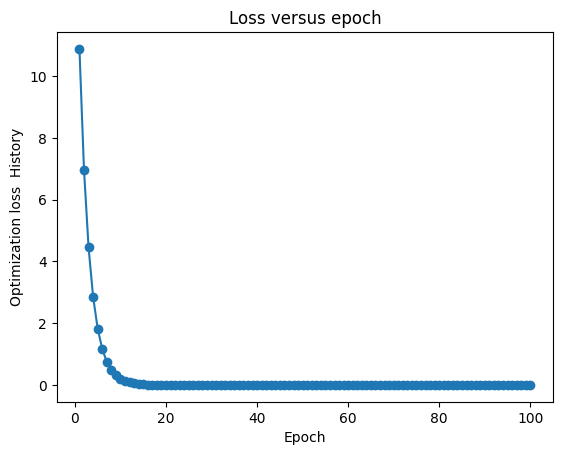

Optimal parameters: [ 1.9999998 -2.9999995]
Optimal solution: 2.842171e-13


In [26]:
# Objective function
def new_objective_function(x):
    return (x[0] - 2)**2 + (x[1] + 3)**2

#  Computing  gradient function  using Jax
grad_new_objective = grad(new_objective_function)

# Initial guess for the minimization
initial_guess = np.array([1.0, 1.0])

# Wrapper function for the new objective function 
def new_objective_with_gradient(x):
    return new_objective_function(x)

#Optimization history
history_values = []
history_epochs = []

# parameters
learning_rate = 0.1
num_epochs = 100

new_params = initial_guess
for epoch in range(num_epochs):
    gradient = grad_new_objective(new_params)
    new_params -= learning_rate * gradient
    
    # History
    history_values.append(new_objective_function(new_params))
    history_epochs.append(epoch + 1)

# Plot optimization history versus epoch
plt.plot(history_epochs, history_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Optimization loss  History')
plt.title('Loss versus epoch')
plt.show()
print("Optimal parameters:", new_params)
print("Optimal solution:", new_objective_function(new_params))


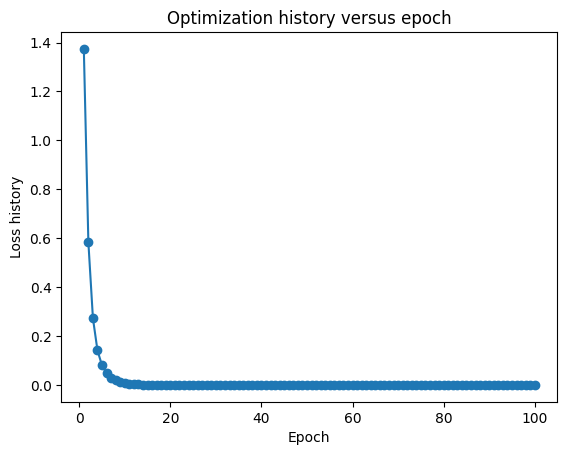

Optimal parameters: [ 6.3765976e-10 -1.5053105e-10]
Optimal value: 4.0393535e-19


In [27]:
# Objective function
def quadratic_objective(a, b, c, x):
    return a * x[0]**2 + b * x[1]**2 + c * x[0] * x[1]

# Gradient of the  objective function
grad_quadratic_objective = jax.grad(quadratic_objective, argnums=(3,))

# Initial guess for the optimization
initial_guess = np.array([1.0, 1.0])

# Initialize lists to store optimization history
history_values = []
history_epochs = []

# Parameters
learning_rate = 0.1
num_epochs = 100

a, b, c = 1.0, 2.0, 0.5  # 

new_params = initial_guess
for epoch in range(num_epochs):
    gradient_tuple = grad_quadratic_objective(a, b, c, new_params)
    gradient = np.concatenate(gradient_tuple).reshape(-1)
    new_params = new_params - learning_rate * gradient
    
    # Record history
    history_values.append(quadratic_objective(a, b, c, new_params))
    history_epochs.append(epoch + 1)

# Plot loss  history versus epoch
plt.plot(history_epochs, history_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss history')
plt.title('Optimization history versus epoch')
plt.show()

print("Optimal parameters:", new_params)
print("Optimal value:", quadratic_objective(a, b, c, new_params))
